In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [3]:
df = pd.read_csv('/kaggle/input/airbnb/airbnb-listings.csv', sep=';')

<ipython-input-3-f062f2630d0c>:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/airbnb/airbnb-listings.csv', sep=';')


In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,I expect you to treat my beloved apartment as ...,https://a0.muscache.com/im/pictures/f3940538-4...,https://a0.muscache.com/im/pictures/f3940538-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/f3940538-4...,20786453,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,50.0,NaN,https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,Oud-West,1.0,1.0,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.365237,4.878250,Apartment,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,600.0,NaN,6000.0,500.0,50.0,4.0,50.0,2.0,1125.0,3 weeks ago,NaN,14.0,44.0,74.0,74.0,2017-04-02,31.0,2015-08-02,2016-11-27,89.0,9.0,8.0,9.0,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,no smoking inside no pets no load music after ...,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,11964927,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,Oud-West,1.0,1.0,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.367309,4.873841,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,175.0,NaN,4000.0,400.0,40.0,2.0,30.0,2.0,112

In [5]:
df.loc[:, 'Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch', nan, '9'],
      dtype=object)

In [6]:
df.loc[:, 'Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan, '9'],
      dtype=object)

In [7]:
df.loc[:, 'Property Type'].unique()

array(['Apartment', 'House', 'Bed & Breakfast', 'Condominium', 'Boat',
       'Villa', 'Townhouse', 'Loft', 'Other', 'Cabin', 'Boutique hotel',
       'Bungalow', 'Camper/RV', 'Hostel', 'Dorm', 'Guesthouse',
       'Serviced apartment', 'Castle', 'Guest suite', 'Tent',
       'Entire Floor', 'Chalet', 'Ryokan (Japan)', 'Timeshare', 'In-law',
       'Cave', 'Vacation home', 'Earth House', 'Hut', 'Treehouse', 'Yurt',
       'Lighthouse', nan, 'Igloo', 'Tipi', 'Train', 'Island',
       'Parking Space', 'Casa particular', '2017-04-02', 'Plane', 'Van',
       'Nature lodge', 'Pension (Korea)', 'Car', 'Heritage hotel (India)'],
      dtype=object)

In [8]:
len(df.loc[:, 'Property Type'].unique())

46

In [9]:
df.loc[:, 'Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan, '9'],
      dtype=object)

#### Data Description

In [12]:
# Check the quantity of data points
df.shape

(494954, 89)

In [13]:
# Check the amount of non-unique datapoints (duplicates)
df.duplicated().sum()

0

In [14]:
# Check the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [15]:
df.dtypes.value_counts()

object     55
float64    33
int64       1
Name: count, dtype: int64

#### Check the amount of NaN (or missing) values

In [16]:
missing_values = df.isna().sum()
top_10_missing = missing_values.sort_values(ascending=False)[:10]
print(top_10_missing)
print(f"The total amount of all missing features: {missing_values.sum()}")
print(f"The total percentage of missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])):.4f}")

Has Availability                485647
Square Feet                     482745
License                         480358
Host Acceptance Rate            452696
Monthly Price                   398863
Weekly Price                    397207
Neighbourhood Group Cleansed    392791
Jurisdiction Names              360401
Notes                           297364
Security Deposit                290942
dtype: int64
The total amount of all missing features: 7793336
The total percentage of missing values: 0.1769


In [17]:
missing_values.loc["Review Scores Value"] / df.shape[0]

0.2607939323654319

In [18]:
missing_values.loc["Price"] / df.shape[0]

0.01607826181826998

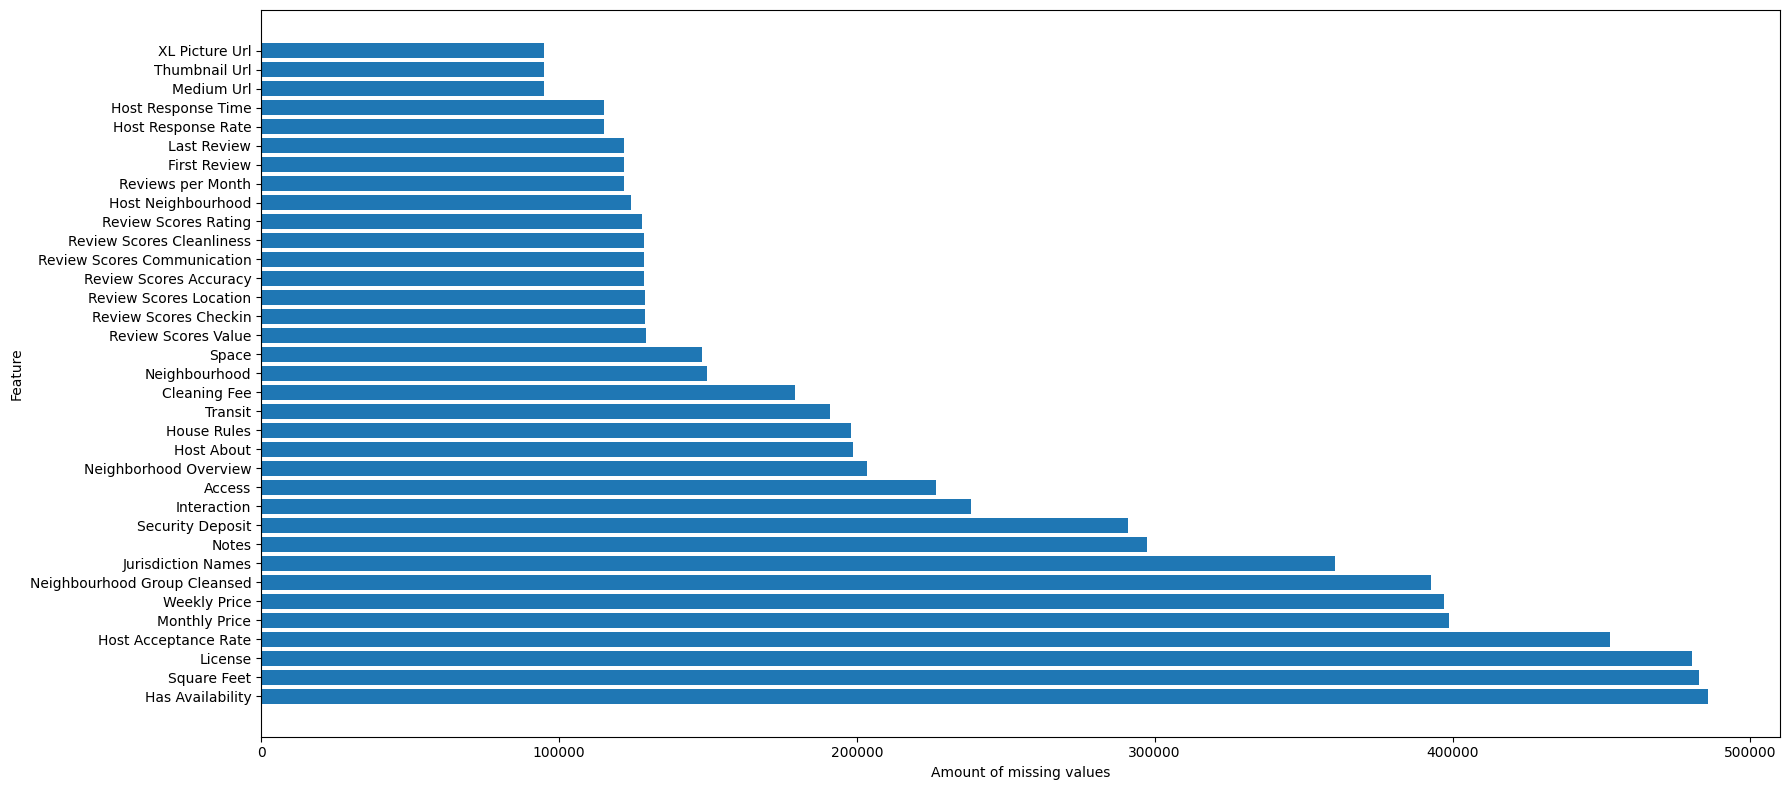

In [19]:
# Simple plot to visualize the missing values
fig, ax = plt.subplots(figsize=(18, 8))

threshold = 0.15
missing_sorted = missing_values.sort_values(ascending=False)
missing_sorted = missing_sorted.loc[missing_sorted / df.shape[0] > threshold]
ax.barh(missing_sorted.index, missing_sorted.values)

ax.set_xlabel("Amount of missing values")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
# Check the dtypes of top 10 features with missing values
df.loc[:, top_10_missing.index.values].dtypes

Has Availability                 object
Square Feet                     float64
License                          object
Host Acceptance Rate             object
Monthly Price                   float64
Weekly Price                    float64
Neighbourhood Group Cleansed     object
Jurisdiction Names               object
Notes                            object
Security Deposit                float64
dtype: object

In [21]:
# Drop features with missing values if they satisfy the condition (>= threshold) for EDA
df_few_missing = df.loc[:, missing_values.loc[missing_values / df.shape[0] < threshold].index.values]
df_few_missing.shape

(494954, 54)

#### Separate object and categorical features

In [22]:
obj_df = df_few_missing.select_dtypes(include=["object", "category"])
print(obj_df.shape)
obj_df.head()

(494954, 34)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Description,Experiences Offered,Picture Url,Host URL,Host Name,Host Since,Host Location,Host Thumbnail Url,Host Picture Url,Host Verifications,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Amenities,Calendar Updated,Calendar last Scraped,Cancellation Policy,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,‪This luxurious apartment is situated in the c...,none,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",De Baarsjes - Oud-West,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",3 weeks ago,2017-04-02,strict,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...","Beautiful, large (105m2, 2 floors) and quiet a...",none,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",5 weeks ago,2017-04-02,strict,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,This central located apartment will make you f...,none,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/23669273,Matthieu,2014-11-12,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/23669273/prof...,https://a0.muscache.com/im/users/23669273/prof...,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, Noord-Holland 1054, Nethe...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1054,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",10 months ago,2017-04-02,flexible,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,Living like an Amsterdam resident in this ligh...,none,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/9238680,Bas,2013-10-05,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/9238680/profi...,https://a0.muscache.com/im/users/9238680/profi...,"email,phone,reviews,jumio","Oud-West, Amsterdam, Noord-Holland 1052 RT, Ne...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1052 RT,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",3 weeks ago,2017-04-02,flexible,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio A

In [23]:
obj_unique = pd.Series([len(obj_df.loc[:, col].unique()) for col in obj_df.columns.values], index=obj_df.columns.values).sort_values(ascending=False)
obj_unique

ID                        494952
Geolocation               494952
Listing Url               494952
Picture Url               494106
Description               484374
Name                      478224
Summary                   458599
Amenities                 381634
Host URL                  362348
Host Thumbnail Url        360701
Host Picture Url          360701
Street                    112852
Host Name                  62339
Zipcode                    50829
Host Location              12145
Smart Location              6104
City                        5533
Host Since                  3130
Neighbourhood Cleansed      2380
State                       1823
Host Verifications          1055
Market                       204
Features                     148
Calendar Updated              81
Scrape ID                     60
Calendar last Scraped         51
Last Scraped                  48
Property Type                 46
Country Code                  24
Country                       24
Cancellati

In [24]:
# Save categorical and object features to separate dataframes
cat_features = ["Room Type", "Experiences Offered", "Bed Type", "Cancellation Policy", "Country", "Property Type"]
cat_df = obj_df.loc[:, cat_features]
obj_df = obj_df.drop(labels=cat_features, axis=1)

In [43]:
obj_df.columns.values

array(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Description', 'Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host Thumbnail Url',
       'Host Picture Url', 'Host Verifications', 'Street',
       'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Amenities', 'Calendar Updated',
       'Calendar last Scraped', 'Geolocation', 'Features'], dtype=object)

In [25]:
print(cat_df.shape)
cat_df.head()

(494954, 6)


,Room Type,Experiences Offered,Bed Type,Cancellation Policy,Country,Property Type
0,Entire home/apt,none,Real Bed,strict,Netherlands,Apartment
1,Entire home/apt,none,Real Bed,strict,Netherlands,Apartment
2,Entire home/apt,none,Real Bed,flexible,Netherlands,Apartment
3,Entire home/apt,none,Real Bed,flexible,Netherlands,Apartment
4,Entire home/apt,none,Real Bed,moderate,Netherlands,Apartment


In [26]:
numerical_df = df_few_missing.select_dtypes(include=['int', 'float'])
#del df
print(numerical_df.shape)
numerical_df.head()

(494954, 20)


,Host ID,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Calculated host listings count
0,20786453,1.0,1.0,52.365237,4.878250,6.0,1.0,3.0,3.0,600.0,4.0,50.0,2.0,1125.0,14.0,44.0,74.0,74.0,31.0,1.0
1,11964927,1.0,1.0,52.367309,4.873841,4.0,1.0,2.0,2.0,175.0,2.0,30.0,2.0,1125.0,0.0,0.0,0.0,259.0,15.0,1.0
2,23669273,1.0,1.0,52.361944,4.866687,4.0,1.0,2.0,2.0,125.0,1.0,0.0,4.0,1125.0,0.0,0.0,0.0,0.0,1.0,1.0
3,9238680,1.0,1.0,52.370146,4.866282,4.0,1.0,2.0,4.0,130.0,2.0,25.0,3.0,30.0,0.0,0.0,0.0,0.0,22.0,1.0
4,89112644,1.0,1.0,52.368818,4.871249,2.0,1.0,0.0,1.0,80.0,1.0,0.0,2.0,1125.0,2.0,21.0,51.0,326.0,16.0,1.0


In [44]:
numerical_df.columns.values

array(['Host Listings Count', 'Host Total Listings Count', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews',
       'Calculated host listings count'], dtype=object)

In [27]:
print(obj_df.shape)
obj_df.head()

(494954, 28)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Description,Picture Url,Host URL,Host Name,Host Since,Host Location,Host Thumbnail Url,Host Picture Url,Host Verifications,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Amenities,Calendar Updated,Calendar last Scraped,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,‪This luxurious apartment is situated in the c...,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",De Baarsjes - Oud-West,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,"TV,Internet,Wireless Internet,Kitchen,Pets all...",3 weeks ago,2017-04-02,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...","Beautiful, large (105m2, 2 floors) and quiet a...",https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",5 weeks ago,2017-04-02,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,This central located apartment will make you f...,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/23669273,Matthieu,2014-11-12,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/23669273/prof...,https://a0.muscache.com/im/users/23669273/prof...,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, Noord-Holland 1054, Nethe...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1054,Amsterdam,"Amsterdam, Netherlands",NL,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",10 months ago,2017-04-02,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,Living like an Amsterdam resident in this ligh...,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/9238680,Bas,2013-10-05,"Amsterdam, North Holland, The Netherlands",https://a0.muscache.com/im/users/9238680/profi...,https://a0.muscache.com/im/users/9238680/profi...,"email,phone,reviews,jumio","Oud-West, Amsterdam, Noord-Holland 1052 RT, Ne...",De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1052 RT,Amsterdam,"Amsterdam, Netherlands",NL,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",3 weeks ago,2017-04-02,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,Studio Apartment Centre Amsterdam Perfect stud...,https://public.opendatasoft.com/api/explore/v2...,https://www.airbnb.com/users/show/89112644,Pablo,2016-08-10,"Amsterdam, North Holland, Netherlands",https://a0.muscache.com/im/pictures/47a93f1a-2...,https://a0.muscache.com/im/pi

#### Plot distribution for numerical and categorical variables

In [28]:
cat_df.iloc[:, 0].value_counts()

Room Type
Entire home/apt    313707
Private room       172306
Shared room          8939
9                       1
Name: count, dtype: int64

In [80]:
def plot_dist(df: pd.DataFrame, max_cols: int = 4, figsize: tuple[int, int] = (14, 8), bar_type: str = "bar", num_bins: int = 20,
              image_name: str = "dist.png") -> None:
    plot_count = df.columns.values.shape[0]

    n_rows = plot_count // max_cols + (1 if plot_count % max_cols > 0 else 0)

    fig, ax = plt.subplots(n_rows, max_cols, figsize=figsize)
    plot_counter = 0

    if n_rows == 1:
        for sub_ax in ax:
            # Check whether the maximum amount of plots were achieved
            if plot_counter == plot_count:
                break
            
            col = df.columns.values[plot_counter]
            if np.issubdtype(df[col].dtype, np.number):
                # Plot histogram for numerical variables
                sub_ax.hist(df[col].dropna(), bins=num_bins, edgecolor='black')
                sub_ax.set_xlabel("Value")
                sub_ax.set_ylabel("Frequency")
            else:
                # Plot bar plot for categorical variables
                values = df[col].value_counts()
                if bar_type == "bar":
                    sub_ax.bar(values.index, values.values)
                elif bar_type == "barh":
                    sub_ax.barh(values.index, values.values)
                else:
                    raise Exception("Incorrect bar type chosen")

                sub_ax.set_xlabel("Count")
                sub_ax.set_ylabel("Feature value")

            sub_ax.set_title(col)
            plot_counter += 1
    else:
        for row in ax:
            for sub_ax in row:
                # Check whether the maximum amount of plots were achieved
                if plot_counter == plot_count:
                    break
                
                col = df.columns.values[plot_counter]
                if np.issubdtype(df[col].dtype, np.number):
                    # Plot histogram for numerical variables
                    sub_ax.hist(df[col].dropna(), bins=num_bins, edgecolor='black')
                    sub_ax.set_xlabel("Value")
                    sub_ax.set_ylabel("Frequency")
                else:
                    # Plot bar plot for categorical variables
                    values = df[col].value_counts()
                    if bar_type == "bar":
                        sub_ax.bar(values.index, values.values)
                    elif bar_type == "barh":
                        sub_ax.barh(values.index, values.values)
                    else:
                        raise Exception("Incorrect bar type chosen")

                    sub_ax.set_xlabel("Count")
                    sub_ax.set_ylabel("Feature value")

                sub_ax.set_title(col)
                plot_counter += 1

    plt.tight_layout()
    plt.savefig(image_name)
    plt.show()

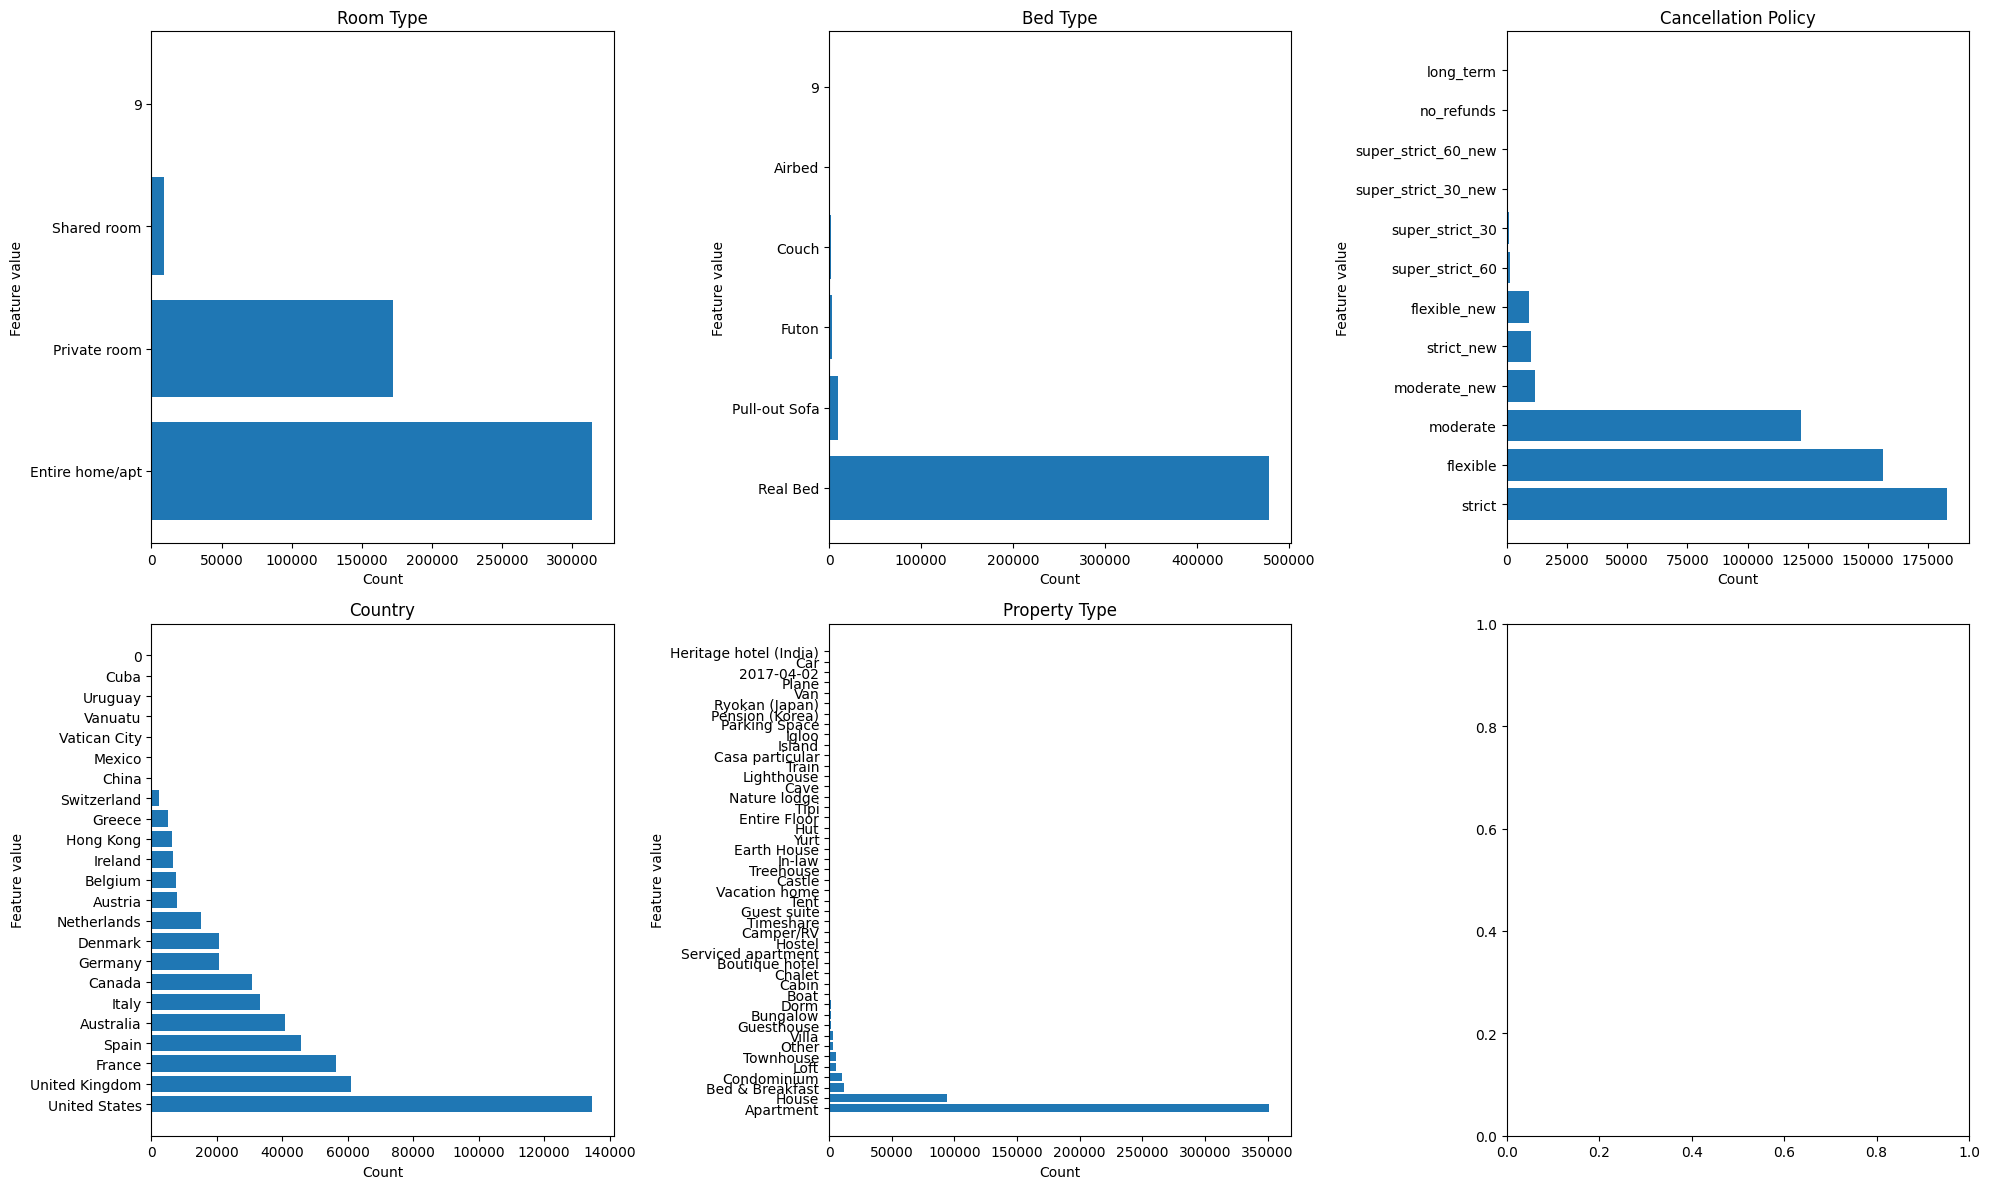

In [81]:
plot_dist(cat_df, max_cols=3, figsize=(20, 12), bar_type="barh", image_name="cat_dist.png")

In [31]:
cat_df.loc[:, 'Experiences Offered'].value_counts(normalize=True)

Experiences Offered
none        0.993496
business    0.002113
social      0.001869
family      0.001665
romantic    0.000855
1           0.000002
Name: proportion, dtype: float64

The following transformations can be made on categorical variables:
- Room type can be combined into 2 or 3 categories;
- Experiences offered can be dropped due to appearance of a single value in 99% of the cases;
- Small amount of countries can be combined into a single group;
- Most property types can be combined into a single group.

In [32]:
cat_df = cat_df.drop(labels=["Experiences Offered"], axis=1)

In [33]:
geo_coords = numerical_df.loc[:, ["Host ID", "Latitude", "Longitude"]]
geo_coords

,Host ID,Latitude,Longitude
0,20786453,52.365237,4.878250
1,11964927,52.367309,4.873841
2,23669273,52.361944,4.866687
3,9238680,52.370146,4.866282
4,89112644,52.368818,4.871249
...,...,...,...
494949,69876337,-37.796844,144.882124
494950,11281861,-37.816746,144.880878
494951,30400875,-37.804905,144.868357
494952,115598722,-37.792251,144.894132


In [34]:
# Check whether we may have categorical values that are represented as numerical
pd.Series([numerical_df.loc[:, col].unique().shape[0] for col in numerical_df.columns.values], index=numerical_df.columns.values)

Host ID                           362348
Host Listings Count                  253
Host Total Listings Count            253
Latitude                          494952
Longitude                         494952
Accommodates                          21
Bathrooms                             19
Bedrooms                              13
Beds                                  20
Price                                946
Guests Included                       20
Extra People                         341
Minimum Nights                       147
Maximum Nights                       652
Availability 30                       32
Availability 60                       62
Availability 90                       92
Availability 365                     367
Number of Reviews                    453
Calculated host listings count       114
dtype: int64

In [35]:
numerical_df.loc[:, 'Host Listings Count'].value_counts()

Host Listings Count
1.0      290263
2.0       73106
3.0       31325
4.0       17219
5.0       10853
          ...  
403.0         1
740.0         1
96.0          1
598.0         1
154.0         1
Name: count, Length: 252, dtype: int64

In [36]:
numerical_df = numerical_df.drop(labels=["Host ID", "Latitude", "Longitude"], axis=1)

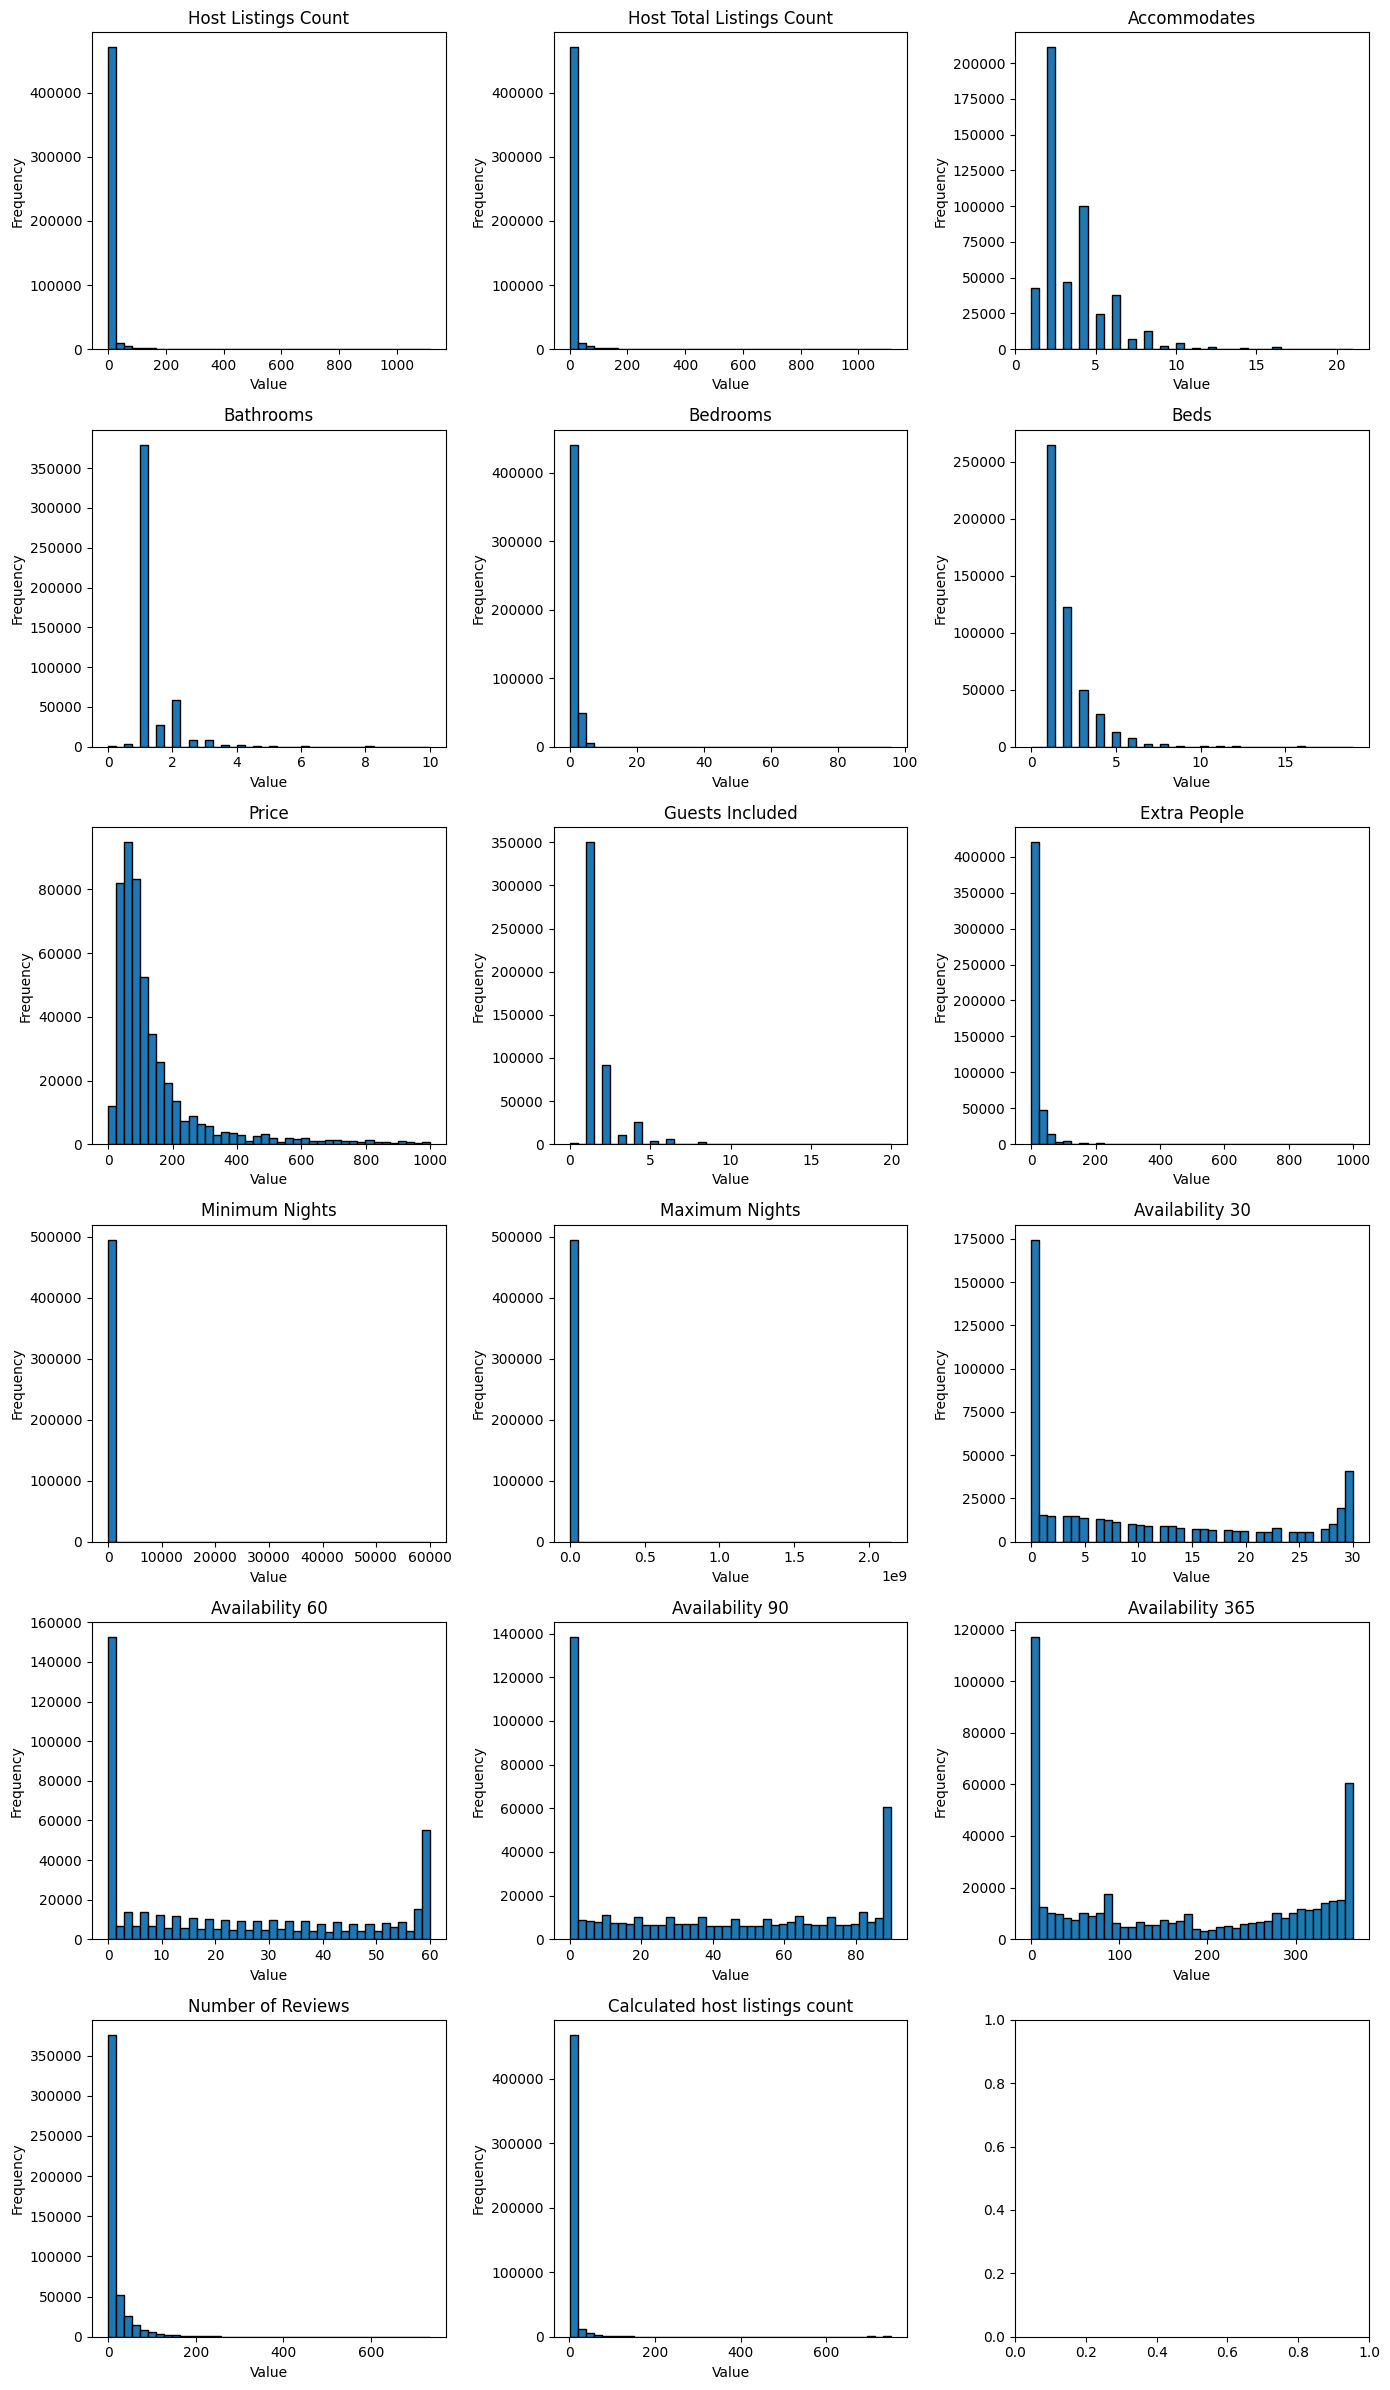

In [82]:
plot_dist(numerical_df, max_cols=3, figsize=(14, 24), num_bins=40, image_name="num_dist.png")

#### Since we want to consider using review scores to predict the price, we might want to check the correlation between these variables

In [38]:
# Select all review scores
review_scores = df.loc[:, ["Review Scores Rating", "Review Scores Accuracy", "Review Scores Checkin", "Review Scores Communication",
                          "Review Scores Location", "Review Scores Value"]]
review_scores.head()

,Review Scores Rating,Review Scores Accuracy,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,89.0,9.0,9.0,10.0,10.0,9.0
1,99.0,9.0,9.0,10.0,10.0,9.0
2,100.0,10.0,10.0,10.0,10.0,10.0
3,97.0,10.0,10.0,9.0,9.0,9.0
4,78.0,8.0,8.0,8.0,9.0,9.0


In [39]:
review_scores.corrwith(numerical_df.loc[:, "Price"])

Review Scores Rating           0.064306
Review Scores Accuracy         0.032642
Review Scores Checkin          0.022973
Review Scores Communication    0.026506
Review Scores Location         0.082470
Review Scores Value            0.003703
dtype: float64

#### Distribution of cat features vs Price

In [40]:
cat_df

,Room Type,Bed Type,Cancellation Policy,Country,Property Type
0,Entire home/apt,Real Bed,strict,Netherlands,Apartment
1,Entire home/apt,Real Bed,strict,Netherlands,Apartment
2,Entire home/apt,Real Bed,flexible,Netherlands,Apartment
3,Entire home/apt,Real Bed,flexible,Netherlands,Apartment
4,Entire home/apt,Real Bed,moderate,Netherlands,Apartment
...,...,...,...,...,...
494949,Private room,Real Bed,moderate,Australia,House
494950,Private room,Real Bed,moderate,Australia,House
494951,Private room,Real Bed,strict,Australia,House
494952,Entire home/apt,Real Bed,flexible,Australia,Apartment


In [48]:
numerical_df

,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Calculated host listings count
0,1.0,1.0,6.0,1.0,3.0,3.0,600.0,4.0,50.0,2.0,1125.0,14.0,44.0,74.0,74.0,31.0,1.0
1,1.0,1.0,4.0,1.0,2.0,2.0,175.0,2.0,30.0,2.0,1125.0,0.0,0.0,0.0,259.0,15.0,1.0
2,1.0,1.0,4.0,1.0,2.0,2.0,125.0,1.0,0.0,4.0,1125.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,4.0,1.0,2.0,4.0,130.0,2.0,25.0,3.0,30.0,0.0,0.0,0.0,0.0,22.0,1.0
4,1.0,1.0,2.0,1.0,0.0,1.0,80.0,1.0,0.0,2.0,1125.0,2.0,21.0,51.0,326.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,2.0,2.0,2.0,1.5,1.0,1.0,30.0,1.0,12.0,1.0,1125.0,0.0,0.0,0.0,0.0,4.0,2.0
494950,1.0,1.0,2.0,1.0,1.0,1.0,42.0,1.0,10.0,7.0,1125.0,23.0,53.0,83.0,358.0,9.0,1.0
494951,5.0,5.0,1.0,1.0,1.0,1.0,33.0,1.0,0.0,3.0,1125.0,2.0,32.0,62.0,337.0,3.0,5.0
494952,1.0,1.0,4.0,1.0,1.0,2.0,62.0,1.0,0.0,5.0,30.0,0.0,0.0,27.0,28.0,0.0,1.0


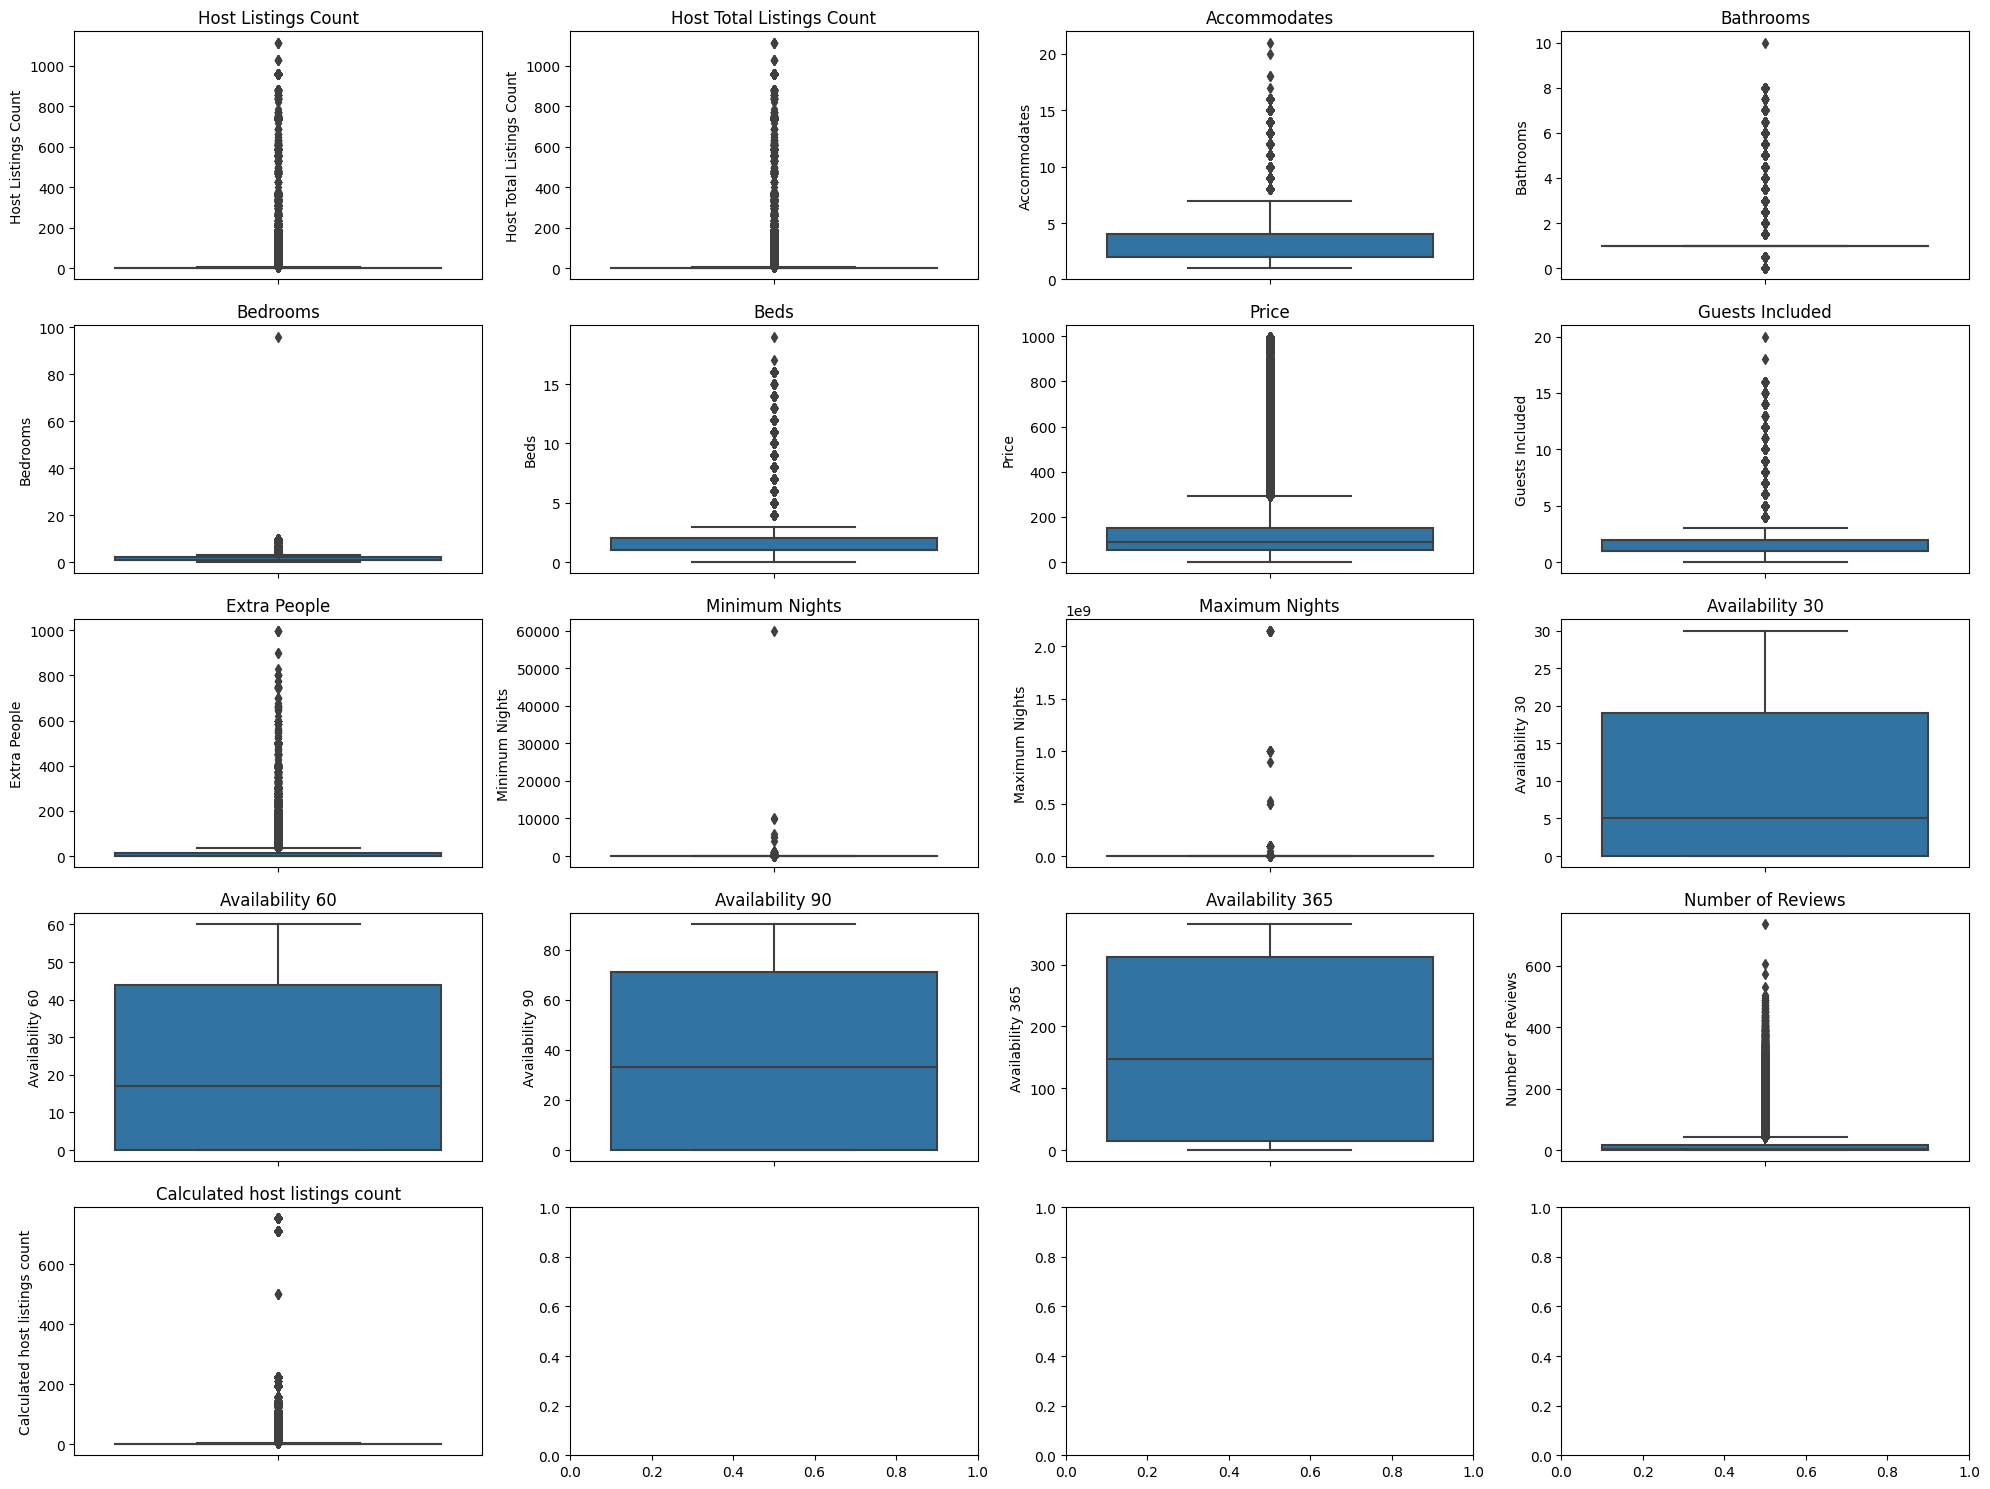

In [83]:
def plot_boxplots(num_df: pd.DataFrame | pd.Series, max_cols: int = 4, figsize: tuple[int, int] = (15, 10),
                 image_name: str = "box.png"):
    plot_count = num_df.columns.values.shape[0]
    n_rows = plot_count // max_cols + (1 if plot_count % max_cols > 0 else 0)

    fig, ax = plt.subplots(n_rows, max_cols, figsize=figsize)
    plot_counter = 0

    for row in ax:
        for sub_ax in row:
            if plot_counter == plot_count:
                break

            sns.boxplot(y=num_df.iloc[:, plot_counter], ax=sub_ax)
            sub_ax.set_title(num_df.columns.values[plot_counter])
            plot_counter += 1
    
    plt.tight_layout()
    plt.savefig(image_name)
    plt.show()

plot_boxplots(numerical_df, figsize=(20, 15))

In [79]:
# We can calculate the exact amount of outliers for each feature
def calculate_outliers(num_df: pd.DataFrame):
    outliers_count = {}
    
    for column in num_df.columns:
        col_no_nans = num_df.loc[:, column].dropna().copy()
        Q1 = col_no_nans.quantile(0.25)
        Q3 = col_no_nans.quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #print(column, lower_bound, upper_bound, Q1, Q3)
        outliers = col_no_nans.loc[(col_no_nans < lower_bound) | (col_no_nans > upper_bound)]
        outliers_count[column] = len(outliers)
    
    return outliers_count

dict(sorted(calculate_outliers(numerical_df).items(), key=lambda x: x[1], reverse=True))

{'Bathrooms': 114272,
 'Calculated host listings count': 89056,
 'Host Listings Count': 63362,
 'Host Total Listings Count': 63362,
 'Beds': 57328,
 'Number of Reviews': 55580,
 'Price': 48906,
 'Guests Included': 40629,
 'Minimum Nights': 38496,
 'Extra People': 34474,
 'Accommodates': 24433,
 'Bedrooms': 18020,
 'Maximum Nights': 703,
 'Availability 30': 0,
 'Availability 60': 0,
 'Availability 90': 0,
 'Availability 365': 0}